<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.873119,88.092408,-189.408845,-29.443318,132.396376,-161.839695
1,0.0,1.0,51.613564,96.475114,-502.342414,-344.253736,122.979864,-467.233599
2,0.0,2.0,32.415508,25.463830,6.518258,74.397596,61.577894,12.819702
3,0.0,3.0,72.719895,27.079016,-68.465768,41.333143,116.016079,-74.682936
4,0.0,4.0,84.318084,77.144073,-192.040258,-20.578102,156.729213,-177.307315
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.450970,55.783740,-34.075926,66.158784,98.008779,-31.849995
119996,999.0,116.0,46.541515,67.515663,-56.923591,67.133588,115.702685,-48.569097
119997,999.0,117.0,24.989989,83.630497,-113.682229,4.938256,97.552503,-92.614247
119998,999.0,118.0,70.180908,29.284278,-6.886730,102.578456,128.178176,-25.599720


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.873119,88.092408,-189.408845,-29.443318,132.396376,-161.839695
1,0.0,1.0,51.613564,96.475114,-502.342414,-344.253736,122.979864,-467.233599
2,0.0,2.0,32.415508,25.463830,6.518258,74.397596,61.577894,12.819702
3,0.0,3.0,72.719895,27.079016,-68.465768,41.333143,116.016079,-74.682936
4,0.0,4.0,84.318084,77.144073,-192.040258,-20.578102,156.729213,-177.307315
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.450970,55.783740,-34.075926,66.158784,98.008779,-31.849995
119996,999.0,116.0,46.541515,67.515663,-56.923591,67.133588,115.702685,-48.569097
119997,999.0,117.0,24.989989,83.630497,-113.682229,4.938256,97.552503,-92.614247
119998,999.0,118.0,70.180908,29.284278,-6.886730,102.578456,128.178176,-25.599720


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.873119  88.092408 -189.408845  -29.443318  132.396376   
      1.0    51.613564  96.475114 -502.342414 -344.253736  122.979864   
      2.0    32.415508  25.463830    6.518258   74.397596   61.577894   
      3.0    72.719895  27.079016  -68.465768   41.333143  116.016079   
      4.0    84.318084  77.144073 -192.040258  -20.578102  156.729213   
...                ...        ...         ...         ...         ...   
999.0 115.0  34.450970  55.783740  -34.075926   66.158784   98.008779   
      116.0  46.541515  67.515663  -56.923591   67.133588  115.702685   
      117.0  24.989989  83.630497 -113.682229    4.938256   97.552503   
      118.0  70.180908  29.284278   -6.886730  102.578456  128.178176   
      119.0  38.533785  56.221658 -242.473262 -137.717819  102.709533   

                  e_hat  
rep   index              
0.0   0.0   -161.839695  
      1.0   -467.233599  
      2.0     12.819702  
      3.0    -74.682936  
      4.0   -177.307315  
...                 ...  
999.0 115.0  -31.849995  
      116.0  -48.569097  
      117.0  -92.614247  
      118.0  -25.599720  
      119.0 -240.427351  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.873119  88.092408 -189.408845  -29.443318  132.396376   
      1.0    51.613564  96.475114 -502.342414 -344.253736  122.979864   
      2.0    32.415508  25.463830    6.518258   74.397596   61.577894   
      3.0    72.719895  27.079016  -68.465768   41.333143  116.016079   
      4.0    84.318084  77.144073 -192.040258  -20.578102  156.729213   
...                ...        ...         ...         ...         ...   
999.0 115.0  34.450970  55.783740  -34.075926   66.158784   98.008779   
      116.0  46.541515  67.515663  -56.923591   67.133588  115.702685   
      117.0  24.989989  83.630497 -113.682229    4.938256   97.552503   
      118.0  70.180908  29.284278   -6.886730  102.578456  128.178176   
      119.0  38.533785  56.221658 -242.473262 -137.717819  102.709533   

                  e_hat  
rep   index              
0.0   0.0   -161.839695  
      1.0   -467.233599  
      2.0     12.819702  
      3.0    -74.682936  
      4.0   -177.307315  
...                 ...  
999.0 115.0  -31.849995  
      116.0  -48.569097  
      117.0  -92.614247  
      118.0  -25.599720  
      119.0 -240.427351  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.873119,88.092408,-189.408845,-29.443318,132.396376,-161.839695
1,0.0,1.0,51.613564,96.475114,-502.342414,-344.253736,122.979864,-467.233599
2,0.0,2.0,32.415508,25.463830,6.518258,74.397596,61.577894,12.819702
3,0.0,3.0,72.719895,27.079016,-68.465768,41.333143,116.016079,-74.682936
4,0.0,4.0,84.318084,77.144073,-192.040258,-20.578102,156.729213,-177.307315
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.450970,55.783740,-34.075926,66.158784,98.008779,-31.849995
119996,999.0,116.0,46.541515,67.515663,-56.923591,67.133588,115.702685,-48.569097
119997,999.0,117.0,24.989989,83.630497,-113.682229,4.938256,97.552503,-92.614247
119998,999.0,118.0,70.180908,29.284278,-6.886730,102.578456,128.178176,-25.599720


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.873119  88.092408 -189.408845  -29.443318  132.396376   
      1.0    51.613564  96.475114 -502.342414 -344.253736  122.979864   
      2.0    32.415508  25.463830    6.518258   74.397596   61.577894   
      3.0    72.719895  27.079016  -68.465768   41.333143  116.016079   
      4.0    84.318084  77.144073 -192.040258  -20.578102  156.729213   
...                ...        ...         ...         ...         ...   
999.0 115.0  34.450970  55.783740  -34.075926   66.158784   98.008779   
      116.0  46.541515  67.515663  -56.923591   67.133588  115.702685   
      117.0  24.989989  83.630497 -113.682229    4.938256   97.552503   
      118.0  70.180908  29.284278   -6.886730  102.578456  128.178176   
      119.0  38.533785  56.221658 -242.473262 -137.717819  102.709533   

                  e_hat  
rep   index              
0.0   0.0   -161.839695  
      1.0   -467.233599  
      2.0     12.819702  
      3.0    -74.682936  
      4.0   -177.307315  
...                 ...  
999.0 115.0  -31.849995  
      116.0  -48.569097  
      117.0  -92.614247  
      118.0  -25.599720  
      119.0 -240.427351  

[120000 rows x 6 columns]

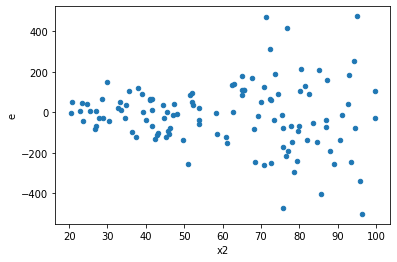

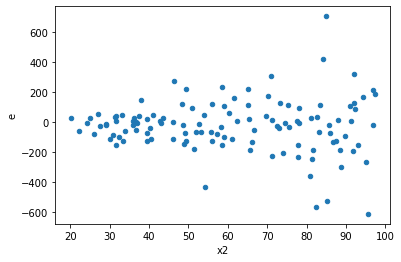

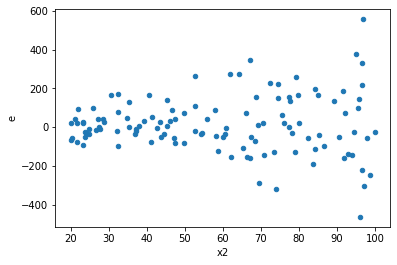

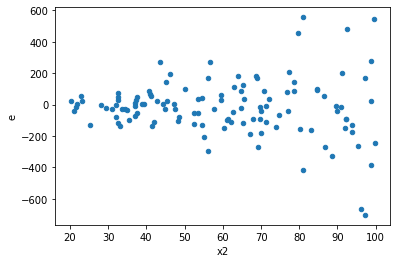

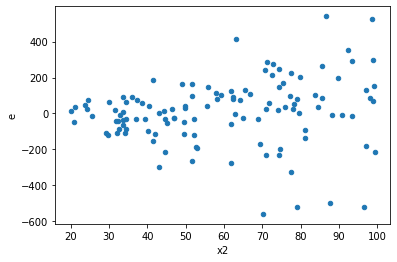

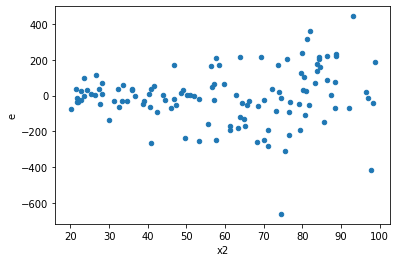

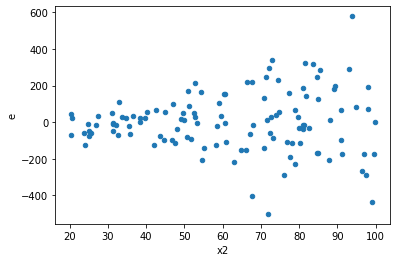

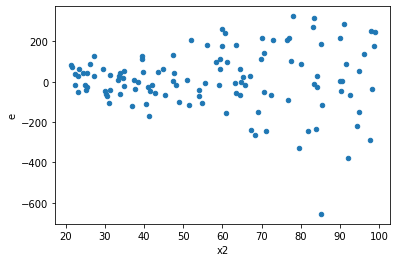

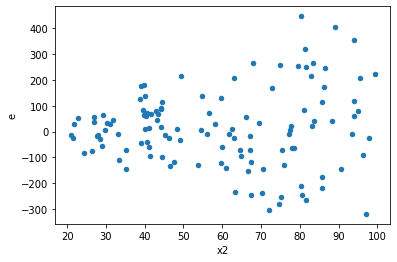

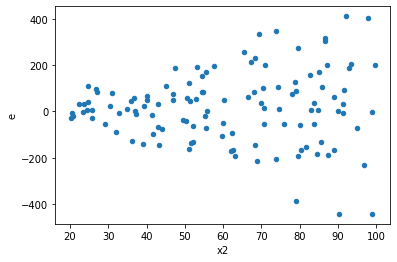

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,46.0,46.0,939531.5600488281,1595918.8045936995,20424.599131496263,34693.887056384774,1.6986324594681617,0.07560953896125677,0.9621952305193716,0.037804769480628386,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,213087.95085709318,1814030.7325114517,4632.346757762895,39435.45070677069,8.513061039889703,2.5236035483544583e-11,0.999999999987382,1.2618017741772292e-11,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,281359.9179417495,3145273.713950647,6116.519955255424,68375.51552066625,11.17882652568096,1.461053500406706e-13,0.999999999999927,7.30526750203353e-14,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,441642.1728532169,2341274.183110154,9600.916801156889,50897.26485022074,5.3012921478590185,9.090607266948325e-08,0.9999999545469637,4.5453036334741626e-08,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,560950.4757152151,1694192.845543744,12194.575559026414,36830.27925095096,3.020218216917703,0.00027300913532779525,0.9998634954323361,0.00013650456766389762,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,593707.7270824926,1847623.9577584108,12906.68971918462,40165.73821213937,3.1120092824759436,0.0001887789492067693,0.9999056105253966,9.438947460338465e-05,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,265293.8479163909,1735768.6295097242,5767.257563399803,37734.100641515746,6.542815233532151,2.7417386139205746e-09,0.9999999986291307,1.3708693069602873e-09,Reject005=0 : Heteroscedasticity
9.0,46.0,46.0,531789.6269502381,1470760.9768123445,11560.644064135611,31973.064713311836,2.7656819581965446,0.0007751454839826089,0.9996124272580087,0.0003875727419913044,Reject005=0 : Heteroscedasticity
10.0,46.0,46.0,731092.33333304,1194206.9567467468,15893.311594196522,25961.02079884232,1.6334557241249863,0.09958429457357032,0.9502078527132148,0.04979214728678516,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,1529729.9192185118,799834.9323260448,33254.99824388069,17387.71592013141,0.5228602266827951,0.03012539996482116,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,939531.5600488281,1595918.8045936995,20424.599131496263,34693.887056384774,1.6986324594681617,0.07560953896125677,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,213087.95085709318,1814030.7325114517,4632.346757762895,39435.45070677069,8.513061039889703,2.5236035483544583e-11,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,281359.9179417495,3145273.713950647,6116.519955255424,68375.51552066625,11.17882652568096,1.461053500406706e-13,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,441642.1728532169,2341274.183110154,9600.916801156889,50897.26485022074,5.3012921478590185,9.090607266948325e-08,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,560950.4757152151,1694192.845543744,12194.575559026414,36830.27925095096,3.020218216917703,0.00027300913532779525,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,593707.7270824926,1847623.9577584108,12906.68971918462,40165.73821213937,3.1120092824759436,0.0001887789492067693,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,1167920.4939382523,1084893.7329730028,25389.5759551794,23584.646368978323,0.9289106053056047,0.8036001308950274,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,265293.8479163909,1735768.6295097242,5767.257563399803,37734.100641515746,6.542815233532151,2.7417386139205746e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    740
Reject005=1 : Homoscedasticity      260
Name: Result_test, dtype: int64